In [2]:
import json

# Define the path to the JSON file
topic_models_path = '../data/models/topic_models.json'

# Open and load the JSON file
with open(topic_models_path, 'r') as file:
    topic_models = json.load(file)

# Iterate over each topic in topic_models
for topic, words in topic_models.items():
    # Sort words by percentage in descending order and get the top 10
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:10]
    
    # Print the topic and its top 10 words
    print(f"Topic: {topic}")
    for word, percent in top_words:
        print(f"  {word}: {percent}")
    print()  # Blank line between topics for readability

Topic: rock
  chorus: 0.012137634829860904
  know: 0.0107365106657743
  verse: 0.009982896309556845
  oh: 0.00923200258278422
  like: 0.009222026941486515
  love: 0.007897080401855107
  time: 0.007860805342590729
  never: 0.0076159486925561765
  one: 0.007324841341959543
  go: 0.007094494715630742

Topic: rb
  love: 0.019655394236190886
  yeah: 0.019618686675697126
  know: 0.019276885128804423
  oh: 0.017026892199523042
  baby: 0.015485776422071955
  like: 0.015179478909099443
  chorus: 0.013229765859922745
  got: 0.011544828656930538
  verse: 0.010720412954037922
  get: 0.0097058400525219

Topic: rap
  like: 0.017725415299780178
  de: 0.012310372273715686
  yeah: 0.012278771767317571
  la: 0.011865990152492194
  got: 0.011346063070660708
  know: 0.010127468542683397
  get: 0.009767025266579897
  verse: 0.007500182690427614
  bitch: 0.006718563914986738
  ich: 0.006329482679959946

Topic: misc
  one: 0.007706677914931156
  said: 0.005942311828448594
  like: 0.005816484458829006
  would

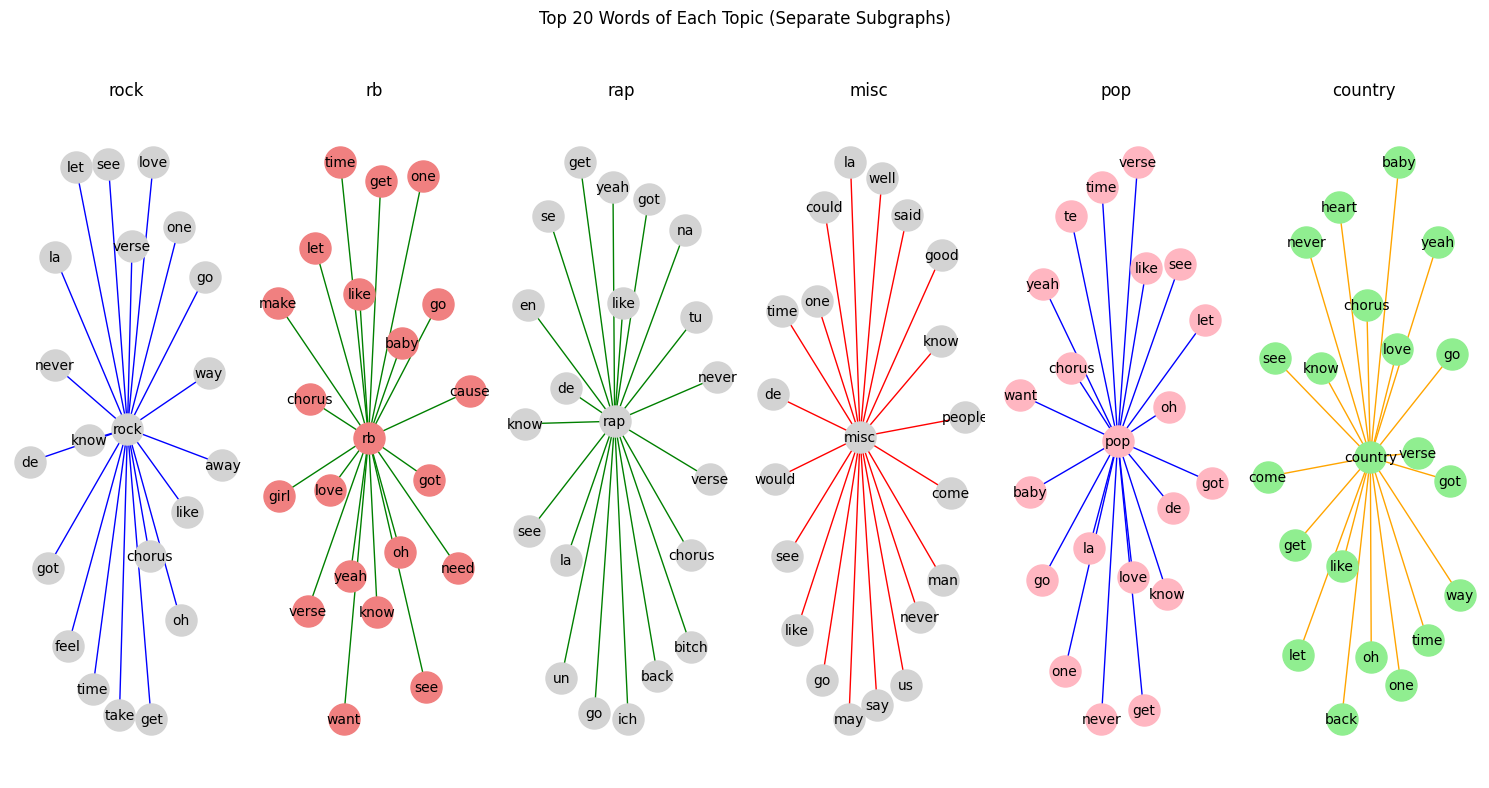

In [3]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate individual graphs for each topic without interconnections
fig, axes = plt.subplots(1, len(topic_models), figsize=(15, 8), squeeze=False)

# Loop through each topic to create separate subgraphs on individual axes
for i, (topic, words) in enumerate(topic_models.items()):
    # Create a new graph for each topic
    subgraph = nx.Graph()
    
    # Add edges between the topic and each of the top 20 words
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:20]
    for word, weight in top_words:
        subgraph.add_edge(topic, word, weight=weight)
    
    # Draw each subgraph on a separate subplot with a unique color
    pos = nx.spring_layout(subgraph, seed=i)
    nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10, 
            edge_color=random.choice(["blue", "green", "orange", "purple", "red"]),
            node_color=random.choice(["lightblue", "lightgreen", "lightcoral", "lightpink", "lightgrey"]),
            ax=axes[0, i])
    
    # Set subplot title to the topic name
    axes[0, i].set_title(topic)

# Show plot
plt.suptitle("Top 20 Words of Each Topic (Separate Subgraphs)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


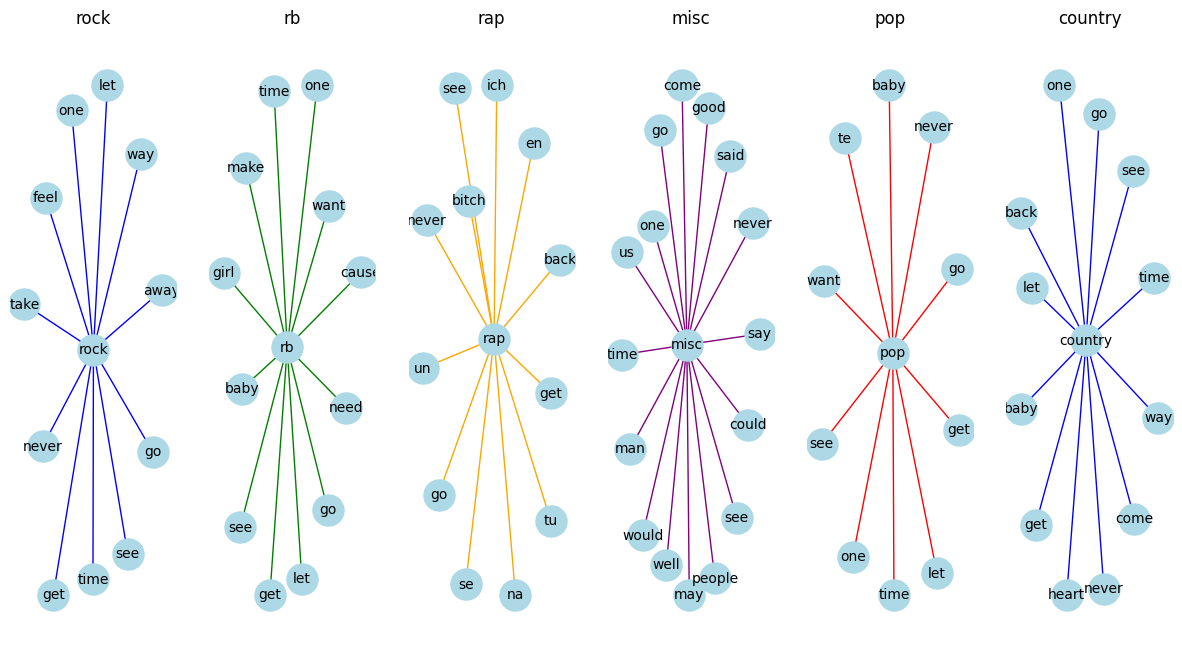

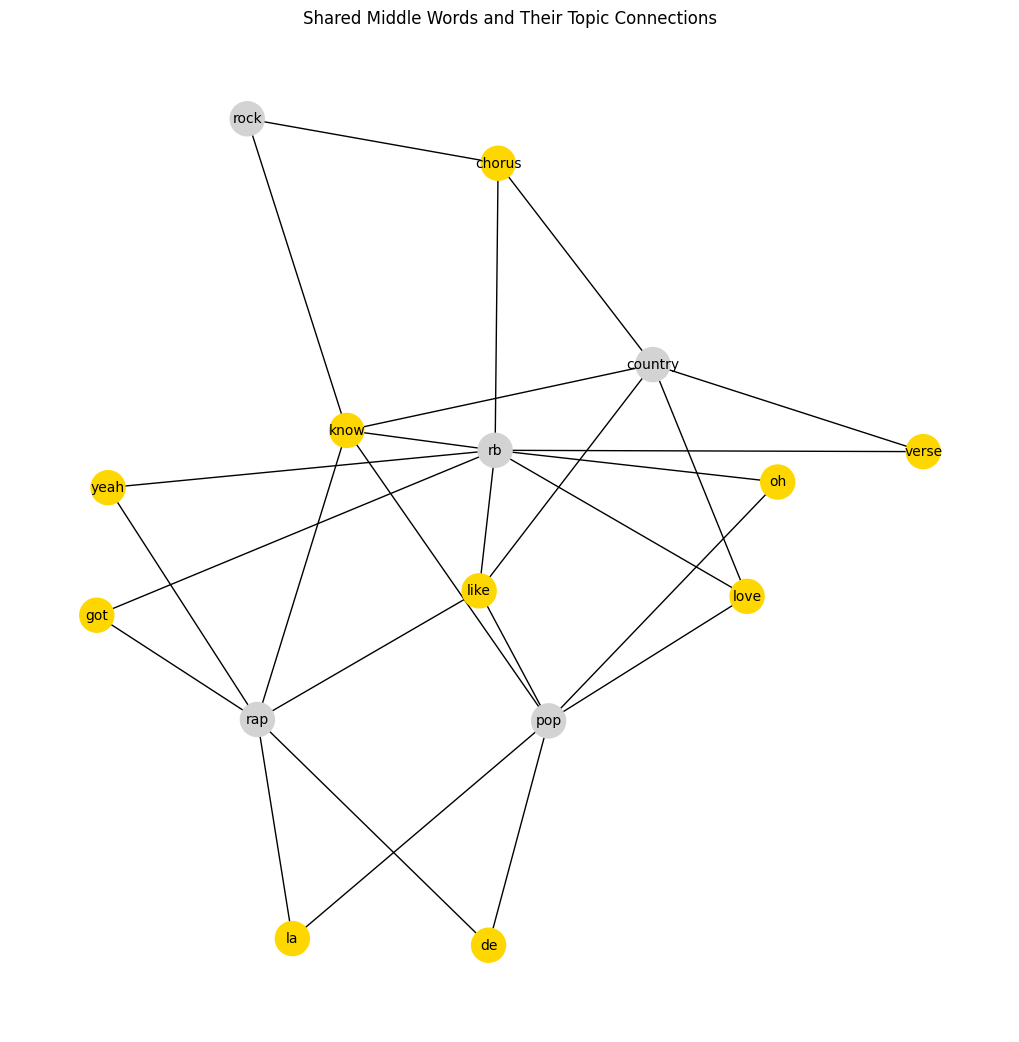

Middle words appearing in multiple topics above the threshold:
chorus: country, rock, rb
know: rap, rock, rb, country, pop
got: rap, rb
like: country, rap, pop, rb
love: country, pop, rb
verse: country, rb
yeah: rap, rb
oh: pop, rb
la: rap, pop
de: rap, pop


In [4]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define a threshold value for high probability
threshold = 0.01  # Adjust as needed

# Identify words that appear with high probability in two or more topics
middle_words = {}
for topic, words in topic_models.items():
    for word, weight in words.items():
        if weight > threshold:
            if word not in middle_words:
                middle_words[word] = {topic}
            else:
                middle_words[word].add(topic)

# Filter to keep only words that appear in multiple topics
middle_words = {word: topics for word, topics in middle_words.items() if len(topics) > 1}

# Generate graphs for each topic individually
fig, axes = plt.subplots(1, len(topic_models), figsize=(15, 8), squeeze=False)
topic_colors = ["blue", "green", "orange", "purple", "red"]  # Define colors for each topic
middle_word_color = "gold"  # Unique color for middle words

# Create individual topic graphs without middle words
for i, (topic, words) in enumerate(topic_models.items()):
    subgraph = nx.Graph()
    subgraph.add_node(topic)  # Central node for the topic
    
    # Add edges between the topic and each of the top 20 words (excluding middle words)
    top_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:20]
    for word, weight in top_words:
        if word not in middle_words:
            subgraph.add_edge(topic, word, weight=weight)
    
    # Draw the topic subgraph on its subplot
    pos = nx.spring_layout(subgraph, seed=i, center=(0, 0))  # Center the topic node
    nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10,
            edge_color=topic_colors[i % len(topic_colors)],
            node_color="lightblue", ax=axes[0, i])
    axes[0, i].set_title(topic)

# Create a new figure to plot middle words and their connections to topics
plt.figure(figsize=(10, 10))
shared_graph = nx.Graph()

# Add middle words as nodes and connect them to relevant topics
for word, topics in middle_words.items():
    shared_graph.add_node(word, color=middle_word_color)  # Middle word as a unique node
    for topic in topics:
        shared_graph.add_edge(word, topic)  # Connect to each associated topic

# Position nodes with a spring layout for clarity
pos = nx.spring_layout(shared_graph, seed=42)
node_colors = [middle_word_color if node in middle_words else "lightgrey" for node in shared_graph.nodes()]

# Draw shared middle word connections with customized styling
nx.draw(shared_graph, pos, with_labels=True, node_size=600, font_size=10,
        node_color=node_colors, edge_color="black")

plt.title("Shared Middle Words and Their Topic Connections")
plt.show()

# Print all middle words with shared topics
print("Middle words appearing in multiple topics above the threshold:")
for word, topics in middle_words.items():
    print(f"{word}: {', '.join(topics)}")
